## Kiutra Driver Example

This notebook shows you how to use the Kiutra driver for a Kiutra L-type Rapid cryostat. From the driver file we import the class for the Kiutra itself, KiutraIns, along with three functions, which facilitate fast sweeps in magnetic field and temperature.

In [1]:
"""
Created on May 01 2023
@authors: Frederik Wolff
"""

import os
import matplotlib.pyplot as plt
import numpy as np

font=16

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id
qc.config.dataset.dond_plot = True

from Kiutra import KiutraIns, BSweepMeasurement, TSweepMeasurement, ADRSweepMeasurement

Kiutra =  KiutraIns("Kiutra", address='192.168.11.20')

[200, 'stable']


The Kiutra is now connected. Let's check the current configuration of the cryostat

In [12]:
Kiutra.loader()

'The puck is connected'


In [4]:
Kiutra.temperature()

0.300888

In [2]:
Kiutra.operation_mode()

'cadr'

So at the moment there is a sample loaded and cold at 0.3K. The ADR cooling system is working in continuous mode abreviated with 'cadr' for continuous adr. There are two modes: continuous, which works down to 0.3K, and single-shot mode, which can cool the sample down to 0.1K, but not keep the temperature stable for more than three hours before heating up and recharging. Single-shot mode is just named 'adr' in the driver. For now we will keep it in the continuous mode.

#### Temperature Control
If ADR was used for the initial cooldown of the cryostat, ADR control will be responsible for controlling the temperature and blocks us from using the other temperature control, just called temperature. We can get the blocks to any controller by calling get_blocks.

In [6]:
Kiutra.temperature.get_blocks()

['ADR control']

To change from ADR control to Temperature control call adr_control.interrupt and set the temperature.

In [17]:
Kiutra.adr_control.interrupt()

'ADR control operation ended'

If you just want to get a full overview over which controls are active call Kiutra.controllers

In [8]:
Kiutra.controllers()

Sample Magnet:           inactive
Temperature control:     inactive
ADR control:             inactive
Loader:                  inactive



The temperature can now be set using the temperature control module

In [2]:
Kiutra.temperature(0.3)

T = 0.307K (sweeping down to 0.30313K, stable=False)
T = 0.307K (sweeping down to 0.3K, stable=False)
T = 0.307K (sweeping down to 0.3K, stable=False)
T = 0.307K (sweeping down to 0.3K, stable=False)
T = 0.307K (sweeping down to 0.3K, stable=False)
T = 0.307K (sweeping down to 0.3K, stable=False)
T = 0.307K (sweeping down to 0.3K, stable=False)
T = 0.307K (sweeping down to 0.3K, stable=False)
T = 0.306K (sweeping down to 0.3K, stable=False)
T = 0.306K (sweeping down to 0.3K, stable=False)
T = 0.306K (sweeping down to 0.3K, stable=False)
T = 0.306K (sweeping down to 0.3K, stable=False)
T = 0.306K (sweeping down to 0.3K, stable=False)
T = 0.306K (sweeping down to 0.3K, stable=False)
T = 0.305K (sweeping down to 0.3K, stable=False)
T = 0.305K (sweeping down to 0.3K, stable=False)
T = 0.305K (sweeping down to 0.3K, stable=False)
T = 0.305K (sweeping down to 0.3K, stable=False)
T = 0.305K (sweeping down to 0.3K, stable=False)
T = 0.305K (sweeping down to 0.3K, stable=False)
T = 0.305K (swee

The rate at which the temperature is changed can be set using temperature_rate

In [19]:
Kiutra.temperature_rate(0.1)

The temperature rate is set for both ADR and temperature control using the command above.

In [2]:
Kiutra.temperature.interrupt()

'Temperature control operation ended'

In [13]:
Kiutra.adr()

0.294376

In [5]:
Kiutra.adr(0.305, operation_mode='cadr')

T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping up to 0.305K, stable=False)
T = 0.300K (sweeping

It is recommended to use ADR to control the temperature during more advanced temperature control sequences due to the greater flexibility of the adr module. Setting up a temperature measurement in the single-shot temperature regime with automatic regeneration of the ADR magnets and to control whether they should be regenerated before moving the system to the setpoint, is possible in a single line. Regenerating before sweeping down increases the time you can measure continuously at temperatures below 0.3K.

In [8]:
Kiutra.adr(0.2, operation_mode='adr', auto_regenerate=True, pre_regenerate=True)

T = 0.400K (sweeping Down             to 0.2K, stable=False)
T = 0.407K (sweeping Down             to 0.2K, stable=False)
T = 0.414K (sweeping Down             to 0.2K, stable=False)
T = 0.418K (sweeping Down             to 0.2K, stable=False)
T = 0.420K (sweeping Down             to 0.2K, stable=False)
T = 0.421K (sweeping Down             to 0.2K, stable=False)
T = 0.422K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Down             to 0.2K, stable=False)
T = 0.423K (sweeping Dow

During regeneration of the ADR your system will heat up significanltly to allow heat to dissipate from the ADR magnet cores. If automatic regneration has been chosen, the system will go through this process when the ADR has used up all its charge. At 200mK this will occur around every five hours and at 100mK it is three hours, though it can be shorter if the sample magnet is swept. Lets go back to 300mK and continuous operation mode

In [10]:
Kiutra.adr(0.3, operation_mode='cadr')

T = 0.200K (sweeping up             to 0.3K, stable=False)
T = 0.200K (sweeping up             to 0.3K, stable=False)
T = 0.200K (sweeping up             to 0.3K, stable=False)
T = 0.200K (sweeping up             to 0.3K, stable=False)
T = 0.200K (sweeping up             to 0.3K, stable=False)
T = 0.200K (sweeping up             to 0.3K, stable=False)
T = 0.201K (sweeping up             to 0.3K, stable=False)
T = 0.201K (sweeping up             to 0.3K, stable=False)
T = 0.202K (sweeping up             to 0.3K, stable=False)
T = 0.203K (sweeping up             to 0.3K, stable=False)
T = 0.204K (sweeping up             to 0.3K, stable=False)
T = 0.205K (sweeping up             to 0.3K, stable=False)
T = 0.207K (sweeping up             to 0.3K, stable=False)
T = 0.208K (sweeping up             to 0.3K, stable=False)
T = 0.209K (sweeping up             to 0.3K, stable=False)
T = 0.211K (sweeping up             to 0.3K, stable=False)
T = 0.211K (sweeping up             to 0.3K, stable=Fals

In [18]:
Kiutra.adr.interrupt()

'ADR Control has ended'

In [21]:
Kiutra.temperature(0.3)

T = 0.300K (sweeping Down             to 0.3K, stable=True)


##### Temperature Sweeps
The three functions imported in the beginning can do measurements during temperature and magnetic field sweeps. The structure of the functions is similar to that of do1d, except for the first argument, which is the Kiutra instrument object. Below we sweep the temperature from 0.3K to 0.4K with a ramp rate of 0.1 K/min while measuring the magnetic field. We use a 1s delay between measurements.

In [4]:
TSweepMeasurement(Kiutra, 0.3, 0.4, 0.1, 1, Kiutra.magnetic_field)

Starting experimental run with id: 14. 
T = 0.301K (sweeping down to 0.3K, stable=True)
Starts sweep from 0.3 K to 0.4 K ramping 0.1 K/min
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.403K (sweeping down to 0.4K, stable=False)
T = 0.403K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to 0.4K, stable=False)
T = 0.402K (sweeping down to

results #14@C:\Users\Kiutra Measurement\experiments.db
------------------------------------------------------
Kiutra_temperature - numeric
Kiutra_magnetic_field - numeric

Note the more dense amount of datapoints in the begining of the scan, where the temperature gradient between the ADR magnets is being established.

Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #14, Experiment tutorial_exp (no sample)'}, xlabel='Temperature (mK)', ylabel='Magnetic field (μT)'>],
 [None])

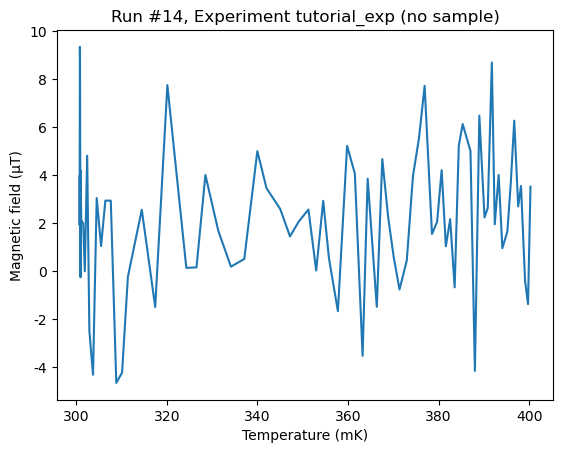

In [5]:
plot_by_id(14)

Let's sweep down again

In [2]:
TSweepMeasurement(Kiutra, 0.4, 0.3, 0.1, 1, Kiutra.magnetic_field)

Starting experimental run with id: 13. 
T = 0.399K (sweeping up to 0.4K, stable=True)
Starts sweep from 0.4 K to 0.3 K ramping 0.1 K/min
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.298K (sweeping up to 0.3K, stable=False)
T = 0.299K (sweeping up to 0.3K, stable=False)
T = 0.299K (sweeping up to 0.3K, stable=False)
T = 0.299K (sweep

results #13@C:\Users\Kiutra Measurement\experiments.db
------------------------------------------------------
Kiutra_temperature - numeric
Kiutra_magnetic_field - numeric

On this scan from 400mK to 300mK the magnetic field fluctuates within $\pm$ 10 $\mu \text{T}$ of 0T with the ADR magnets spooling up.

Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #13, Experiment tutorial_exp (no sample)'}, xlabel='Temperature (mK)', ylabel='Magnetic field (μT)'>],
 [None])

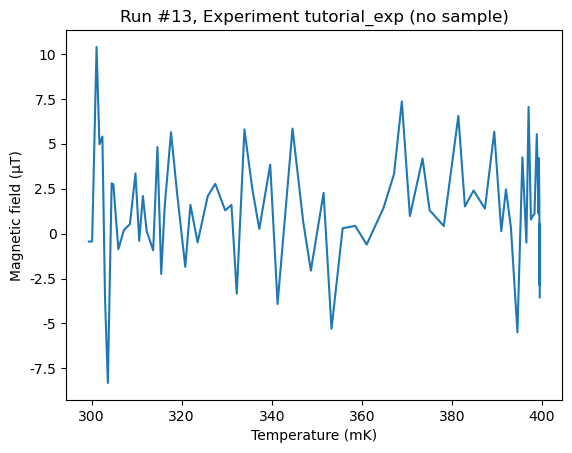

In [3]:
plot_by_id(13)

In order to combat the uneven distribution of points the step_mode can be changed to 'temp'. Now, the interval or delay between datapoints is no longer measured in seconds, but in Kelvin. The function constructs a list of temperature setpoints. When the temperature has passed a setpoint, the next measurement will be made. Below we sweep up and down in the same range as we did above.

In [7]:
TSweepMeasurement(Kiutra, 0.4, 0.3, 0.1, 0.001, Kiutra.magnetic_field, step_mode='temp')

T = 0.400K (sweeping down             to 0.4K, stable=True)
Starting experimental run with id: 59. 
Starts sweep from 0.4 K to 0.3 K ramping 0.1 K/min


results #59@C:\Users\Kiutra Measurement\experiments.db
------------------------------------------------------
Kiutra_temperature - numeric
Kiutra_magnetic_field - numeric

Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #59, Experiment tutorial_exp (no sample)'}, xlabel='Temperature (mK)', ylabel='Magnetic field (μT)'>],
 [None])

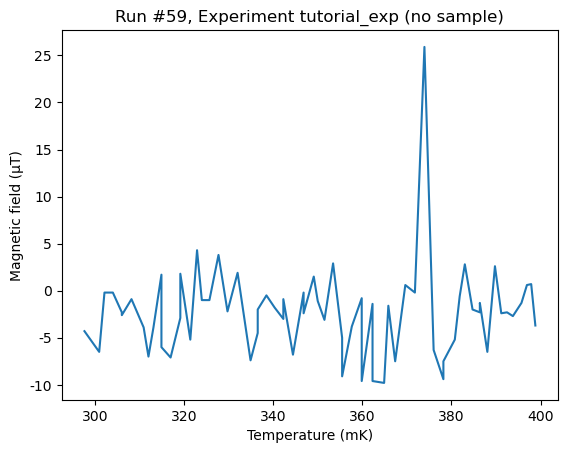

In [34]:
plot_by_id(59)

In [8]:
TSweepMeasurement(Kiutra, 0.3, 0.4, 0.1, 0.001, Kiutra.magnetic_field, step_mode='temp')

T = 0.288K (sweeping up             to 0.3K, stable=False)
T = 0.288K (sweeping up             to 0.3K, stable=False)
T = 0.287K (sweeping up             to 0.3K, stable=False)
T = 0.287K (sweeping up             to 0.3K, stable=False)
T = 0.286K (sweeping up             to 0.3K, stable=False)
T = 0.285K (sweeping up             to 0.3K, stable=False)
T = 0.284K (sweeping up             to 0.3K, stable=False)
T = 0.284K (sweeping up             to 0.3K, stable=False)
T = 0.284K (sweeping up             to 0.3K, stable=False)
T = 0.284K (sweeping up             to 0.3K, stable=False)
T = 0.284K (sweeping up             to 0.3K, stable=False)
T = 0.284K (sweeping up             to 0.3K, stable=False)
T = 0.284K (sweeping up             to 0.3K, stable=False)
T = 0.285K (sweeping up             to 0.3K, stable=False)
T = 0.285K (sweeping up             to 0.3K, stable=False)
T = 0.287K (sweeping up             to 0.3K, stable=False)
T = 0.287K (sweeping up             to 0.3K, stable=Fals

results #60@C:\Users\Kiutra Measurement\experiments.db
------------------------------------------------------
Kiutra_temperature - numeric
Kiutra_magnetic_field - numeric

Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #60, Experiment tutorial_exp (no sample)'}, xlabel='Temperature (mK)', ylabel='Magnetic field (μT)'>],
 [None])

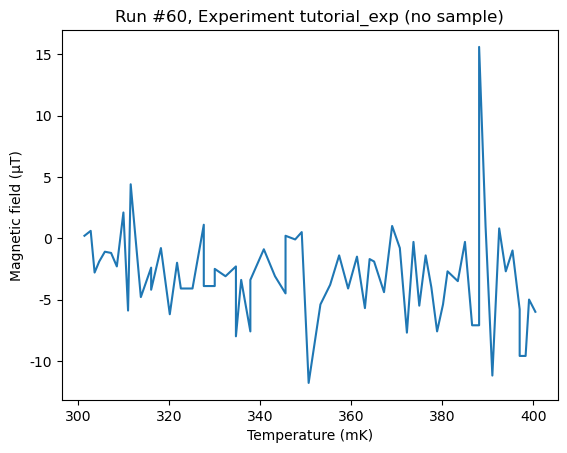

In [33]:
plot_by_id(60)

The runs 13, 14, 59 and 60 were compared in the two plots below, showing the difference in density of datapoints when changing the step_mode. We observe many small bunching events when using step_mode = 'temp' instead of the larger trends seen when using step_mode = time

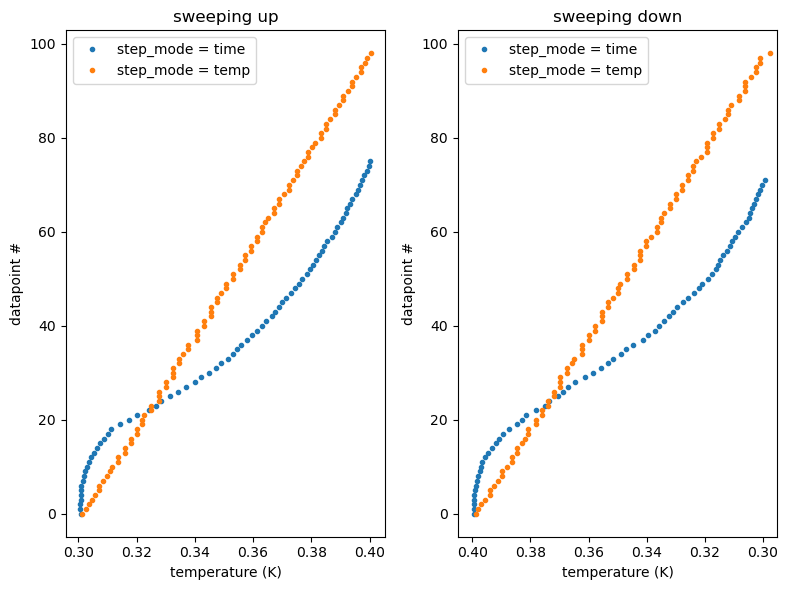

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(8,6))

ax[0].plot(list1, np.linspace(0,len(list1)-1, len(list1)), '.', label='step_mode = time')
ax[0].plot(list4, np.linspace(0,len(list4)-1, len(list4)), label='step_mode = temp')
ax[0].set_xlabel('temperature (K)')
ax[0].set_ylabel('datapoint #')
ax[0].set_title('sweeping up')
ax[0].legend()

ax[1].plot(list3, np.linspace(0,len(list3)-1, len(list3)), '.', label='step_mode = time')
ax[1].plot(list2, np.linspace(0,len(list2)-1, len(list2)), label='step_mode = temp')
ax[1].set_xlabel('temperature (K)')
ax[1].set_ylabel('datapoint #')
ax[1].set_xlim(0.405, 0.295)
ax[1].set_title('sweeping down')
ax[1].legend()

plt.tight_layout()

In [20]:
Kiutra.temperature.interrupt()

'Temperature Control has ended'

You also have the option to use ADR control to do your fast temperature sweeps with the greater control of the ADR module

In [5]:
ADRSweepMeasurement(Kiutra, 0.3, 0.4, 0.1, 1, Kiutra.magnetic_field)

Starting experimental run with id: 50. 
Starts sweep from 0.3 K to 0.4 K ramping 0.1 K/min


results #50@C:\Users\Kiutra Measurement\experiments.db
------------------------------------------------------
Kiutra_adr - numeric
Kiutra_magnetic_field - numeric

Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #50, Experiment tutorial_exp (no sample)'}, xlabel='ADR Control (mK)', ylabel='Magnetic field (μT)'>],
 [None])

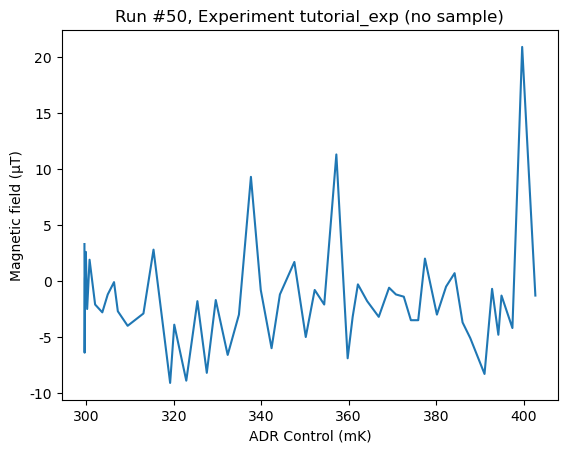

In [6]:
plot_by_id(50)

In [2]:
ADRSweepMeasurement(Kiutra, 0.4, 0.2, 0.1, 1, 
                    Kiutra.magnetic_field, 
                    adr_mode=None, 
                    operation_mode='adr', 
                    auto_regenerate=False, 
                    pre_regenerate=False)

Starting experimental run with id: 49. 
Starts sweep from 0.4 K to 0.2 K ramping 0.1 K/min


results #49@C:\Users\Kiutra Measurement\experiments.db
------------------------------------------------------
Kiutra_adr - numeric
Kiutra_magnetic_field - numeric

Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #49, Experiment tutorial_exp (no sample)'}, xlabel='ADR Control (mK)', ylabel='Magnetic field (μT)'>],
 [None])

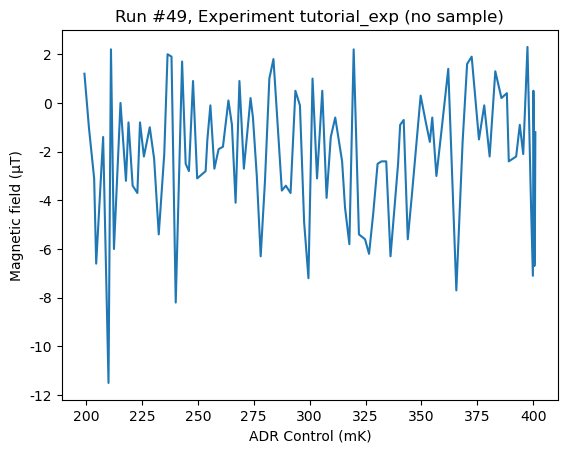

In [3]:
plot_by_id(49)

In [4]:
Kiutra.adr(0.3, operation_mode='cadr')

T = 0.187K (sweeping up             to 0.3K, stable=False)
T = 0.187K (sweeping up             to 0.3K, stable=False)
T = 0.188K (sweeping up             to 0.3K, stable=False)
T = 0.191K (sweeping up             to 0.3K, stable=False)
T = 0.194K (sweeping up             to 0.3K, stable=False)
T = 0.196K (sweeping up             to 0.3K, stable=False)
T = 0.196K (sweeping up             to 0.3K, stable=False)
T = 0.195K (sweeping up             to 0.3K, stable=False)
T = 0.194K (sweeping up             to 0.3K, stable=False)
T = 0.194K (sweeping up             to 0.3K, stable=False)
T = 0.194K (sweeping up             to 0.3K, stable=False)
T = 0.195K (sweeping up             to 0.3K, stable=False)
T = 0.195K (sweeping up             to 0.3K, stable=False)
T = 0.196K (sweeping up             to 0.3K, stable=False)
T = 0.199K (sweeping up             to 0.3K, stable=False)
T = 0.200K (sweeping up             to 0.3K, stable=False)
T = 0.201K (sweeping up             to 0.3K, stable=Fals

In [11]:
Kiutra.adr.interrupt()

'ADR control operation ended'

In [12]:
Kiutra.temperature(0.3)

T = 0.300K (sweeping up to 0.3K, stable=True)


#### Magnetic Field
A magnetic field can be applied parallel to the sample holder up to 4 T independently of the adr magnets responsible of the cooling. The field can be read and set using the magnetic_field attribute to the Kiutra object. 

In [14]:
Kiutra.magnetic_field()

-6.1e-06

In [15]:
Kiutra.magnetic_field(0.1)

B = 0.002T (sweeping up             to 0.1T, stable=False)
B = 0.005T (sweeping up             to 0.1T, stable=False)
B = 0.007T (sweeping up             to 0.1T, stable=False)
B = 0.008T (sweeping up             to 0.1T, stable=False)
B = 0.010T (sweeping up             to 0.1T, stable=False)
B = 0.013T (sweeping up             to 0.1T, stable=False)
B = 0.014T (sweeping up             to 0.1T, stable=False)
B = 0.016T (sweeping up             to 0.1T, stable=False)
B = 0.018T (sweeping up             to 0.1T, stable=False)
B = 0.020T (sweeping up             to 0.1T, stable=False)
B = 0.022T (sweeping up             to 0.1T, stable=False)
B = 0.024T (sweeping up             to 0.1T, stable=False)
B = 0.025T (sweeping up             to 0.1T, stable=False)
B = 0.027T (sweeping up             to 0.1T, stable=False)
B = 0.029T (sweeping up             to 0.1T, stable=False)
B = 0.032T (sweeping up             to 0.1T, stable=False)
B = 0.033T (sweeping up             to 0.1T, stable=Fals

In [16]:
Kiutra.magnetic_field(0)

B = 0.098T (sweeping Down             to 0T, stable=False)
B = 0.095T (sweeping Down             to 0T, stable=False)
B = 0.094T (sweeping Down             to 0T, stable=False)
B = 0.092T (sweeping Down             to 0T, stable=False)
B = 0.089T (sweeping Down             to 0T, stable=False)
B = 0.087T (sweeping Down             to 0T, stable=False)
B = 0.085T (sweeping Down             to 0T, stable=False)
B = 0.084T (sweeping Down             to 0T, stable=False)
B = 0.082T (sweeping Down             to 0T, stable=False)
B = 0.079T (sweeping Down             to 0T, stable=False)
B = 0.077T (sweeping Down             to 0T, stable=False)
B = 0.075T (sweeping Down             to 0T, stable=False)
B = 0.074T (sweeping Down             to 0T, stable=False)
B = 0.071T (sweeping Down             to 0T, stable=False)
B = 0.069T (sweeping Down             to 0T, stable=False)
B = 0.068T (sweeping Down             to 0T, stable=False)
B = 0.066T (sweeping Down             to 0T, stable=Fals

Similar to the temperature we can set a sweep rate for the magnetic field using

In [11]:
Kiutra.magnetic_field_rate(0.05)

##### Magnetic Field Sweeps

Below we do a fast magnetic field sweep from 0T to 0.1T at 0.05 T/min while measuring the temperature of the sample and then back from 0.1T to 0T at 0.1 T/min

In [11]:
BSweepMeasurement(Kiutra, 0, 0.1, 0.05, 1, Kiutra.temperature)

Starting experimental run with id: 1. 
B = -0.000 (stable, stable=True)
Starts sweep from 0 T to 0.1 T ramping 0.05 T/min


results #1@D:\database\KiutraDriverTest.db
------------------------------------------
Kiutra_magnetic_field - numeric
Kiutra_temperature - numeric

2023-05-03 17:37:05,107 ¦ qcodes.dataset.sqlite.queries ¦ WARNING ¦ queries ¦ mark_run_complete ¦ 1001 ¦ Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #1, Experiment KiutraDriver (Test1)'}, xlabel='Magnetic field (mT)', ylabel='Temperature (mK)'>],
 [None])

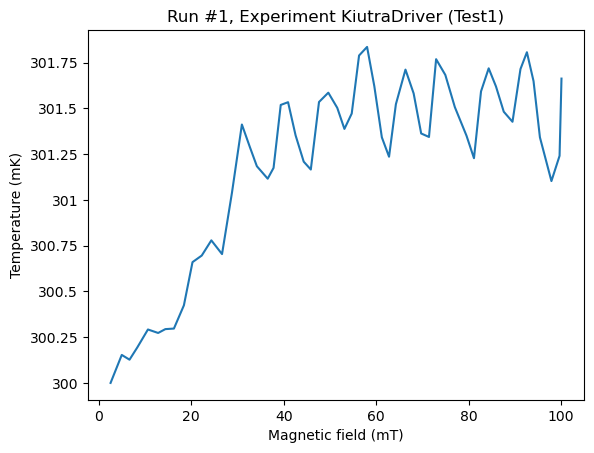

In [12]:
plot_by_id(1)

In [13]:
BSweepMeasurement(Kiutra, Kiutra.magnetic_field(), 0, 0.1, 1, Kiutra.temperature)

Starting experimental run with id: 2. 
B = 0.100 (ramping to 0.100 T, stable=False)
B = 0.100 (ramping to 0.100 T, stable=False)
B = 0.100 (ramping to 0.100 T, stable=False)
Starts sweep from 0.09999855 T to 0 T ramping 0.1 T/min


results #2@D:\database\KiutraDriverTest.db
------------------------------------------
Kiutra_magnetic_field - numeric
Kiutra_temperature - numeric

2023-05-03 17:40:07,401 ¦ qcodes.dataset.sqlite.queries ¦ WARNING ¦ queries ¦ mark_run_complete ¦ 1001 ¦ Trying to mark a run completed that was already completed.


([<Axes: title={'center': 'Run #2, Experiment KiutraDriver (Test1)'}, xlabel='Magnetic field (mT)', ylabel='Temperature (mK)'>],
 [None])

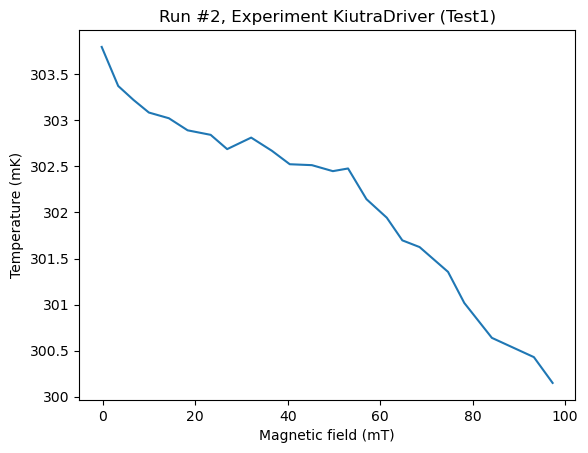

In [15]:
plot_by_id(2)

The Kiutra appears to be able to keep the temperature from rising continuously during the 0.05 T/min sweep, but not when sweeping at 0.1 T/min.